In [1]:
%load_ext autoreload
# Always reload modules so that as you change code in src, it gets loaded
%autoreload 2
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import pandas as pd
import numpy as np
import random
import math
import EoN
import seaborn as sns
import time

# New Imports
#from ctrace.contact_tracing import *
#from ctrace.constraint import *
#from ctrace.solve import *
#from ctrace.simulation import *
#from ctrace.restricted import *
from ctrace.simulation import *
from ctrace.dataset import *
from ctrace.recommender import *
from ctrace.problem_label import *
from ctrace.utils import *
from ctrace.exec.param import GraphParam, SIRParam, FileParam, ParamBase, LambdaParam

In [2]:
graphs = {
    "montgomery": GraphParam('montgomery').data,
    "cville": GraphParam('cville').data,
    "montgomery_extra": GraphParam('montgomery_extra').data,
    "cville_extra": GraphParam('cville_extra').data
}

In [3]:
def segmented_run(run_id):
    in_data = pd.read_csv(PROJECT_ROOT / f'output/{run_id}/input.csv')
    out_data = pd.read_csv(PROJECT_ROOT / f'output/{run_id}/main.csv')
    df = pd.merge(in_data, out_data, how="left", on=["id"])
    
    agents = pd.json_normalize(pd.Series(df['agent_params']).apply(eval))
    df = pd.concat([df, agents], axis=1)
    # Normalize to graph size
    df['total_percent'] = df.apply(lambda row: row['total'] / len(graphs[row['graph']]) * 100, axis=1)

    # Rename the labels
    df['agent'] = df['agent'].replace({"segmented_greedy": "Segmented Degree"})
    df['graph'] = df['graph'].replace({
        'montgomery_extra': "Montgomery*", 
        'cville_extra': "Albemarle*", 
        'montgomery': "Montgomery", 
        'cville': "Albemarle"
    })
    
    return df

df_reg = segmented_run('run_7q76m')
df_extra = segmented_run('seg_extra_cMA6Y')

df = pd.concat([df_reg, df_extra])
df.head()
# df_prop.head()
# df_budgets[df_budgets['split_top'] == 0.1]

,id,graph,budget,agent,agent_params,policy,transmission_rate,transmission_known,compliance_rate,compliance_known,discovery_rate,snitch_rate,from_cache,trial_id,seed,peak,total,k1,k2,total_percent
0,0,Montgomery,750,binary_segmented_greedy,{'k1': 0.0},A,0.05,False,-1.0,False,1.0,1.0,c7.json,0,15795,5020,38982,0.0,NaN,51.661211
1,1,Montgomery,750,binary_segmented_greedy,{'k1': 0.0},A,0.05,False,-1.0,False,1.0,1.0,c7.json,1,860,4943,38801,0.0,NaN,51.421339
2,2,Montgomery,750,binary_segmented_greedy,{'k1': 0.0},A,0.05,False,-1.0,False,1.0,1.0,c7.json,2,76820,5004,38829,0.0,NaN,51.458447
3,3,Montgomery,750,binary_segmented_greedy,{'k1': 0.0},A,0.05,False,-1.0,False,1.0,1.0,c7.json,3,54886,5128,39008,0.0,NaN,51.695668
4,4,Montgomery,750,binary_segmented_greedy,{'k1': 0.0},A,0.05,False,-1.0,False,1.0,1.0,c7.json,4,6265,5022,38702,0.0,NaN,51.290139


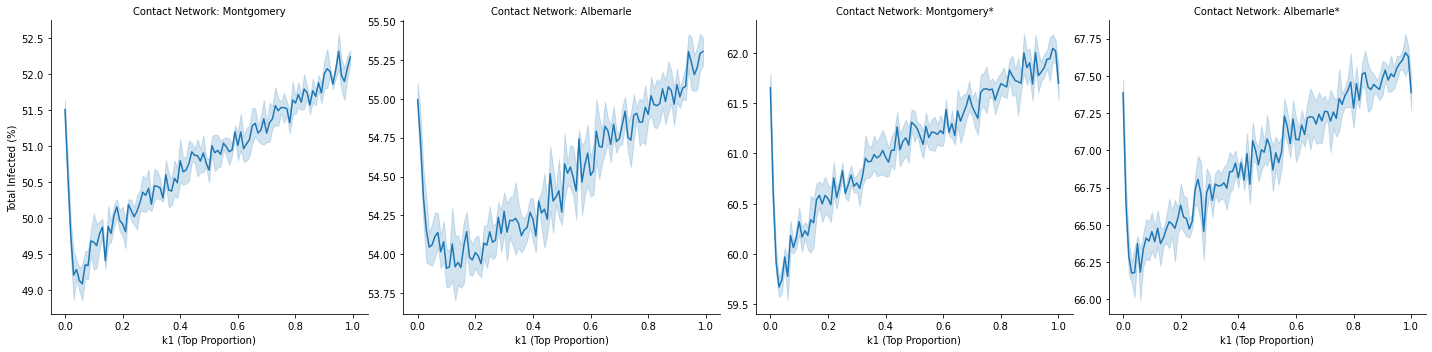

In [4]:
g = sns.relplot(
    x="k1", 
    y="total_percent", 
    col="graph", 
    kind="line", 
    data=df, 
    facet_kws={'sharey': False, 'sharex': True}
)

(g
  .set_axis_labels("k1 (Top Proportion)", "Total Infected (%)")
  .set_titles("Contact Network: {col_name}")
  .tight_layout(w_pad=0)
)
g.savefig("combined_segmented_aug_k1", dpi=500)

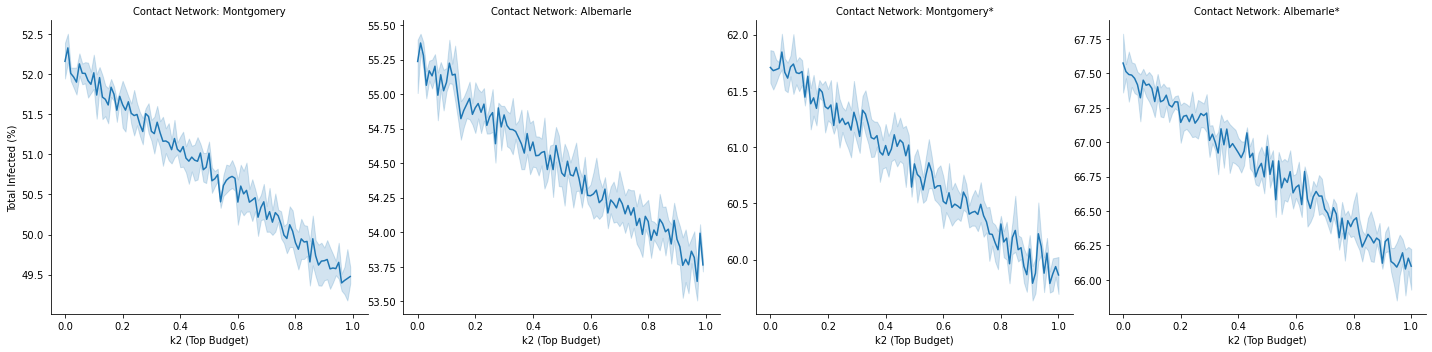

In [5]:
g = sns.relplot(
    x="k2", 
    y="total_percent", 
    col="graph", 
    kind="line", 
    data=df, 
    facet_kws={'sharey': False, 'sharex': True}
)

(g
  .set_axis_labels("k2 (Top Budget)", "Total Infected (%)")
  .set_titles("Contact Network: {col_name}")
  .tight_layout(w_pad=0)
)
g.savefig("combined_segmented_aug_k2", dpi=500)